## Dataset analysis and machine learning regressions

We will see the differents steps to do that. This notebook is split in several parts:

I. Merge two datasets and Create a new dataset for Glucose label and Hemo label Prediction.

II. Importation & Devices Available

III. Preprocessing

IV. Regression Models

### I. Merge two datasets and Create a new dataset for Glucose label and Hemo label Prediction.

#### >>> Load the Clinical Data

In [1]:
import pandas as pd
import numpy 
import numpy as np
df_Clinical = pd.read_csv("/media/rezwan/Softwares/THESIS/CSV_Files/Shared AmaderGram Data 2018-DataSheet - Clinical data.csv")

In [2]:
df_Clinical.describe()

Video ID  Glucose (mmd/L)       Sub_ID         Age  Hb (gm/dL)  \
count       0.0       138.000000   146.000000  146.000000  138.000000   
mean        NaN         5.475362  1075.198630   38.678082   10.964493   
std         NaN         1.772162    42.689839   13.335943    1.027633   
min         NaN         4.700000  1001.000000   14.000000    6.700000   
25%         NaN         4.825000  1038.250000   28.000000   10.300000   
50%         NaN         5.000000  1075.500000   35.000000   11.200000   
75%         NaN         5.100000  1111.750000   50.000000   11.700000   
max         NaN        15.800000  1148.000000   70.000000   14.400000   

           Hb (%)  Glucose (mmd/L).1   HbA1c (%)  Creatinine         BUN  \
count  138.000000         138.000000  138.000000  138.000000  138.000000   
mean    68.739130           5.475362    4.975362    0.820290    9.471739   
std      6.459649           1.772162    0.640462    0.120921    1.732303   
min     42.000000           4.700000    4.500000    0.600000    7.400000   
25%     65.000000           4.825000    4.700000    0.725000    8.400000   
50%     70.000000           5.000000    4.800000    0.800000    9.200000   
75%     73.000000           5.100000    4.900000    0.900000   10.100000   
max     90.000000          15.800000    9.500000    1.400000   19.600000   

             SPO2         BPM       Sub ID    Children  Unnamed: 25  \
count  146.000000  146.000000   146.000000  118.000000          0.0   
mean    97.952055   84.424658  1075.198630    1.855932          NaN   
std      0.555005   13.234665    42.689839    1.207352          NaN   
min     96.000000   60.000000  1001.000000    0.000000          NaN   
25%     98.000000   74.000000  1038.250000    1.000000          NaN   
50%     98.000000   84.000000  1075.500000    2.000000          NaN   
75%     98.000000   94.000000  1111.750000    2.750000          NaN   
max     99.000000  126.000000  1148.000000    5.000000          NaN   

       Unnamed: 26  Unnamed: 27  
count          0.0          0.0  
mean           NaN          NaN  
std            NaN          NaN  
min            NaN          NaN  
25%            NaN          NaN  
50%            NaN          NaN  
75%            NaN          NaN  
max            NaN          NaN

In [3]:
df_Clinical.head()

Video ID          Date  Glucose (mmd/L)  Sub_ID  Age     Sex  Hb (gm/dL)  \
0       NaN  June-25-2018              4.7    1001   15  Female         9.9   
1       NaN  June-25-2018              5.0    1002   46  Female        10.3   
2       NaN  June-25-2018              4.8    1003   35  Female        11.2   
3       NaN  June-25-2018              5.1    1004   35  Female        11.2   
4       NaN  June-25-2018              4.9    1005   25  Female         9.9   

   Hb (%)  Glucose (mmd/L).1  HbA1c (%)     ...      Sick  Unstable  \
0    62.0                4.7        4.6     ...        No        No   
1    65.0                5.0        4.7     ...        No        No   
2    70.0                4.8        4.6     ...        No        No   
3    70.0                5.1        4.8     ...        No        No   
4    62.0                4.9        4.7     ...        No        No   

                    Others-1  Others-2 Others-3  Children Status Unnamed: 25  \
0  Menstrution-(June-5-2018)       NaN      NaN       NaN    NaN         NaN   
1               Menopose-Yes       NaN      NaN       NaN    NaN         NaN   
2  Menstrution-(May-15-2018)       NaN      NaN       3.0      M         NaN   
3                Hysterctomy       NaN      NaN       3.0      L         NaN   
4  Menstrution-(May-20-2018)       NaN      NaN       1.0      M         NaN   

  Unnamed: 26 Unnamed: 27  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

[5 rows x 28 columns]

In [4]:
df_Clinical.columns

Index(['Video ID', 'Date', 'Glucose (mmd/L)', 'Sub_ID', 'Age', 'Sex',
       'Hb (gm/dL)', 'Hb (%)', 'Glucose (mmd/L).1', 'HbA1c (%)', 'Creatinine',
       'BUN', 'SPO2', 'BPM', 'Diabetes(Yes/No)', 'Sub ID', 'Married',
       'Pregnant', 'Sick', 'Unstable', 'Others-1', 'Others-2', 'Others-3',
       'Children', 'Status', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [5]:
df_Clinical.shape

(146, 28)

#### >>>  Load "LED-0850_PPG_CSV/table_PPG_Smooth_R_0850.csv" dataset

In [6]:
df_PPG_Smooth_R_0850 = pd.read_csv("/media/rezwan/Softwares/THESIS/CSV_Files/LED-0850_PPG_CSV/table_PPG_Smooth_R_0850.csv")

In [7]:
df_PPG_Smooth_R_0850.describe()

Unnamed: 0       Sub_ID  Systolic_peak(x)  Diastolic_peak(y)  \
count   143.00000   143.000000        143.000000         143.000000   
mean     71.00000  1075.923077        118.572591         118.518361   
std      41.42463    42.739808          2.407993           2.482689   
min       0.00000  1001.000000        112.032176         110.975518   
25%      35.50000  1038.500000        117.180099         117.114452   
50%      71.00000  1077.000000        117.990691         118.179048   
75%     106.50000  1112.500000        119.803452         119.936183   
max     142.00000  1148.000000        127.780102         127.857028   

       Dicrotic_notch(z)  Pulse_interval(tpi)  Augmentation_index(y/x)  \
count         143.000000           143.000000               143.000000   
mean          117.293657             8.087179                 0.999551   
std             2.530058             0.502423                 0.006632   
min           110.632824             6.800000                 0.978778   
25%           115.886972             7.775000                 0.995710   
50%           116.826781             8.066667                 0.999744   
75%           118.439987             8.283333                 1.003041   
max           127.715155             9.666667                 1.014797   

       Relative_augmentation_index((x-y)/x)         z/x     (y-z)/x  \
count                            143.000000  143.000000  143.000000   
mean                               0.000449    0.989240    0.010311   
std                                0.006632    0.010032    0.008910   
min                               -0.014797    0.932867    0.000004   
25%                               -0.003041    0.985048    0.003592   
50%                                0.000256    0.991115    0.008946   
75%                                0.004290    0.996368    0.013911   
max                                0.021222    0.999998    0.063398   

                           ...                       (tb1+tb2)/tpi  \
count                      ...                          143.000000   
mean                       ...                            0.014771   
std                        ...                            0.010185   
min                        ...                            0.001957   
25%                        ...                            0.008825   
50%                        ...                            0.012072   
75%                        ...                            0.014846   
max                        ...                            0.054705   

       (te1+t2)/tpi  (tf1+t3)/tpi  Fundamental_component_frequency(fbase)  \
count    143.000000    143.000000                              143.000000   
mean      -0.013108     -0.023432                                0.177881   
std        0.029296      0.039906                                0.011110   
min       -0.094907     -0.157407                                0.146484   
25%       -0.040383     -0.054379                                0.175781   
50%        0.004376      0.000000                                0.175781   
75%        0.009318      0.009747                                0.183105   
max        0.038647      0.023158                                0.212402   

       Fundamental_component_magnitude(|sbase|)  2nd_harmonic_frequency(f2nd)  \
count                                143.000000                    143.000000   
mean                                  25.606377                      0.305594   
std                                    0.507306                      0.018782   
min                                   23.839683                      0.252686   
25%                                   25.324289                      0.300293   
50%                                   25.536044                      0.307617   
75%                                   25.856198                      0.314941   
max                                   27.769635                      0.358887   

     

In [8]:
df_PPG_Smooth_R_0850.head()

Unnamed: 0  Sub_ID  Systolic_peak(x)  Diastolic_peak(y)  Dicrotic_notch(z)  \
0           0    1001        127.780102         127.857028         127.715155   
1           1    1002        119.289992         118.978536         116.929020   
2           2    1003        116.732213         114.889245         113.955958   
3           3    1004        117.240109         118.974948         117.186216   
4           4    1005        117.158649         117.266465         116.376400   

   Pulse_interval(tpi)  Augmentation_index(y/x)  \
0             8.133333                 1.000602   
1             7.516667                 0.997389   
2             8.283333                 0.984212   
3             8.150000                 1.014797   
4             7.750000                 1.000920   

   Relative_augmentation_index((x-y)/x)       z/x   (y-z)/x  \
0                             -0.000602  0.999492  0.001110   
1                              0.002611  0.980208  0.017181   
2                              0.015788  0.976217  0.007995   
3                             -0.014797  0.999540  0.015257   
4                             -0.000920  0.993323  0.007597   

                       ...                       (tb1+tb2)/tpi  (te1+t2)/tpi  \
0                      ...                            0.006148     -0.038934   
1                      ...                            0.004435     -0.070953   
2                      ...                            0.002012     -0.082495   
3                      ...                            0.008180      0.012270   
4                      ...                            0.006452     -0.043011   

   (tf1+t3)/tpi  Fundamental_component_frequency(fbase)  \
0     -0.055328                                0.175781   
1     -0.130820                                0.190430   
2     -0.086519                                0.175781   
3      0.010225                                0.175781   
4     -0.047312                                0.183105   

   Fundamental_component_magnitude(|sbase|)  2nd_harmonic_frequency(f2nd)  \
0                                 27.769635                      0.300293   
1                                 25.815363                      0.329590   
2                                 25.405175                      0.300293   
3                                 25.358160                      0.300293   
4                                 25.250577                      0.314941   

   2nd_harmonic_magnitude(|s2nd|)  3rd_harmonic_frequency(f3rd)  \
0                       16.363403                      0.424805   
1                       15.045875                      0.461426   
2                       14.805818                      0.417480   
3                       14.973524                      0.424805   
4                       15.013630                      0.446777   

   3rd_harmonic_magnitude(|s3rd|)  \
0                       11.663835   
1                       10.805838   
2                       10.752602   
3                       10.639113   
4                       10.560329   

   Stress-induced_vascular_response_index(sVRI)  
0                                      0.653877  
1                                      1.290773  
2                                      2.279867  
3                                      0.550867  
4                                      0.797859  

[5 rows x 48 columns]

In [9]:
df_PPG_Smooth_R_0850.columns

Index(['Unnamed: 0', 'Sub_ID', 'Systolic_peak(x)', 'Diastolic_peak(y)',
       'Dicrotic_notch(z)', 'Pulse_interval(tpi)', 'Augmentation_index(y/x)',
       'Relative_augmentation_index((x-y)/x)', 'z/x', '(y-z)/x',
       'Systolic_peak_time(t1)', 'Diastolic_peak_time(t2)',
       'Dicrotic_notch_time(t3)',
       'Time_between_systolic_and_diastolic_peaks(∆T)',
       'Time_between_half_systolic_peak_points(w)',
       'Inflection_point_area_ratio(A2/A1)',
       'Systolic_peak_rising_slope(t1/x)',
       'Diastolic_peak_falling_slope(y/(tpi-t3))', 't1/tpi', 't2/tpi',
       't3/tpi', '∆T/tpi', 'ta1', 'tb1', 'te1', 'tf1', 'b2/a2', 'e2/a2',
       '(b2+e2)/a2', 'ta2', 'tb2', 'ta1/tpi', 'tb1/tpi', 'te1/tpi', 'tf1/tpi',
       'ta2/tpi', 'tb2/tpi', '(ta1+ta2)/tpi', '(tb1+tb2)/tpi', '(te1+t2)/tpi',
       '(tf1+t3)/tpi', 'Fundamental_component_frequency(fbase)',
       'Fundamental_component_magnitude(|sbase|)',
       '2nd_harmonic_frequency(f2nd)', '2nd_harmonic_magnitude(|s2nd|)',
    

In [10]:
df_PPG_Smooth_R_0850.shape

(143, 48)

#### Merge the two dataset

In [11]:
df_merge = pd.merge(df_PPG_Smooth_R_0850, df_Clinical, on='Sub_ID', how='outer')

In [12]:
df_merge

Unnamed: 0  Sub_ID  Systolic_peak(x)  Diastolic_peak(y)  \
0           0.0    1001        127.780102         127.857028   
1           1.0    1002        119.289992         118.978536   
2           2.0    1003        116.732213         114.889245   
3           3.0    1004        117.240109         118.974948   
4           4.0    1005        117.158649         117.266465   
5           5.0    1007        112.218162         110.975518   
6           6.0    1008        116.841129         117.034976   
7           7.0    1009        115.983382         116.013100   
8           8.0    1010        113.541700         113.923011   
9           9.0    1011        117.832884         117.984644   
10         10.0    1012        117.450033         117.438385   
11         11.0    1013        121.133798         120.281878   
12         12.0    1014        114.058005         115.101879   
13         13.0    1017        119.763683         118.596890   
14         14.0    1018        118.277655         118.533187   
15         15.0    1019        117.432028         116.553708   
16         16.0    1020        116.523359         115.869848   
17         17.0    1021        117.184251         117.201057   
18         18.0    1022        118.726398         118.733093   
19         19.0    1023        119.735689         121.392083   
20         20.0    1024        116.670413         116.625383   
21         21.0    1025        117.401284         117.306408   
22         22.0    1026        119.066610         120.013434   
23         23.0    1027        118.451601         118.785334   
24         24.0    1028        120.634440         120.363047   
25         25.0    1029        117.959847         116.258980   
26         26.0    1030        115.310840         115.485709   
27         27.0    1032        122.869420         124.017186   
28         28.0    1033        118.453702         119.475788   
29         29.0    1034        114.715832         115.120884   
..          ...     ...               ...                ...   
116       116.0    1121        117.890851         117.463889   
117       117.0    1122        117.339289         116.690959   
118       118.0    1123        117.439198         117.148504   
119       119.0    1124        122.821170         123.513645   
120       120.0    1125        116.471061         116.360357   
121       121.0    1126        119.681572         119.239189   
122       122.0    1127        117.990691         117.986598   
123       123.0    1128        115.645376         116.517398   
124       124.0    1129        120.239471         120.590043   
125       125.0    1130        117.309765         117.106419   
126       126.0    1132        112.032176         111.553545   
127       127.0    1133        120.222696         120.225809   
128       128.0    1134        118.599040         119.001335   
129       129.0    1135        119.473264         119.758560   
130       130.0    1136        116.724042         116.853139   
131       131.0    1137        117.972149         117.323097   
132       132.0    1138        117.542967         117.406407   
133       133.0    1139        117.638682         116.250846   
134       134.0    1140        119.115621         120.237277   
135       135.0    1141        122.583271         121.477631   
136       136.0    1142        120.437437         121.169309   
137       137.0    1143        116.160365         117.304417   
138       138.0    1144        125.434714         125.090726   
139       139.0    1145        122.559659         122.355309   
140       140.0    1146        124.551007         124.168573   
141       141.0    1147        121.570244         121.676551   
142       142.0    1148        120.975787         120.933456   
143         NaN    1015               NaN                NaN   
144         NaN    1043               NaN                NaN   
145         NaN    1064               NaN                NaN   

     Dicrotic_notch(z)  Pulse_interv

In [13]:
df_merge.shape

(146, 75)

In [14]:
df_merge.columns

Index(['Unnamed: 0', 'Sub_ID', 'Systolic_peak(x)', 'Diastolic_peak(y)',
       'Dicrotic_notch(z)', 'Pulse_interval(tpi)', 'Augmentation_index(y/x)',
       'Relative_augmentation_index((x-y)/x)', 'z/x', '(y-z)/x',
       'Systolic_peak_time(t1)', 'Diastolic_peak_time(t2)',
       'Dicrotic_notch_time(t3)',
       'Time_between_systolic_and_diastolic_peaks(∆T)',
       'Time_between_half_systolic_peak_points(w)',
       'Inflection_point_area_ratio(A2/A1)',
       'Systolic_peak_rising_slope(t1/x)',
       'Diastolic_peak_falling_slope(y/(tpi-t3))', 't1/tpi', 't2/tpi',
       't3/tpi', '∆T/tpi', 'ta1', 'tb1', 'te1', 'tf1', 'b2/a2', 'e2/a2',
       '(b2+e2)/a2', 'ta2', 'tb2', 'ta1/tpi', 'tb1/tpi', 'te1/tpi', 'tf1/tpi',
       'ta2/tpi', 'tb2/tpi', '(ta1+ta2)/tpi', '(tb1+tb2)/tpi', '(te1+t2)/tpi',
       '(tf1+t3)/tpi', 'Fundamental_component_frequency(fbase)',
       'Fundamental_component_magnitude(|sbase|)',
       '2nd_harmonic_frequency(f2nd)', '2nd_harmonic_magnitude(|s2nd|)',
    

#### Retrieve the dataset for analysis

In [15]:
col_list = ['Sub_ID', 'Age', 'Sex', 'Systolic_peak(x)', 'Diastolic_peak(y)',
       'Dicrotic_notch(z)', 'Pulse_interval(tpi)', 'Augmentation_index(y/x)',
       'Relative_augmentation_index((x-y)/x)', 'z/x', '(y-z)/x',
       'Systolic_peak_time(t1)', 'Diastolic_peak_time(t2)',
       'Dicrotic_notch_time(t3)',
       'Time_between_systolic_and_diastolic_peaks(∆T)',
       'Time_between_half_systolic_peak_points(w)',
       'Inflection_point_area_ratio(A2/A1)',
       'Systolic_peak_rising_slope(t1/x)',
       'Diastolic_peak_falling_slope(y/(tpi-t3))', 't1/tpi', 't2/tpi',
       't3/tpi', '∆T/tpi', 'ta1', 'tb1', 'te1', 'tf1', 'b2/a2', 'e2/a2',
       '(b2+e2)/a2', 'ta2', 'tb2', 'ta1/tpi', 'tb1/tpi', 'te1/tpi', 'tf1/tpi',
       'ta2/tpi', 'tb2/tpi', '(ta1+ta2)/tpi', '(tb1+tb2)/tpi', '(te1+t2)/tpi',
       '(tf1+t3)/tpi', 'Fundamental_component_frequency(fbase)',
       'Fundamental_component_magnitude(|sbase|)',
       '2nd_harmonic_frequency(f2nd)', '2nd_harmonic_magnitude(|s2nd|)',
       '3rd_harmonic_frequency(f3rd)', '3rd_harmonic_magnitude(|s3rd|)',
       'Stress-induced_vascular_response_index(sVRI)', 'Glucose (mmd/L)',  'Hb (gm/dL)']
print(len(col_list))

51


In [16]:
dataFrame = df_merge[col_list]

In [17]:
dataFrame.shape

(146, 51)

In [18]:
dataFrame

Sub_ID  Age     Sex  Systolic_peak(x)  Diastolic_peak(y)  \
0      1001   15  Female        127.780102         127.857028   
1      1002   46  Female        119.289992         118.978536   
2      1003   35  Female        116.732213         114.889245   
3      1004   35  Female        117.240109         118.974948   
4      1005   25  Female        117.158649         117.266465   
5      1007   29  Female        112.218162         110.975518   
6      1008   25  Female        116.841129         117.034976   
7      1009   41  Female        115.983382         116.013100   
8      1010   34  Female        113.541700         113.923011   
9      1011   27  Female        117.832884         117.984644   
10     1012   35  Female        117.450033         117.438385   
11     1013   20  Female        121.133798         120.281878   
12     1014   50  Female        114.058005         115.101879   
13     1017   24  Female        119.763683         118.596890   
14     1018   30  Female        118.277655         118.533187   
15     1019   65  Female        117.432028         116.553708   
16     1020   42  Female        116.523359         115.869848   
17     1021   35  Female        117.184251         117.201057   
18     1022   29  Female        118.726398         118.733093   
19     1023   45  Female        119.735689         121.392083   
20     1024   18  Female        116.670413         116.625383   
21     1025   35    Male        117.401284         117.306408   
22     1026   28  Female        119.066610         120.013434   
23     1027   40  Female        118.451601         118.785334   
24     1028   48  Female        120.634440         120.363047   
25     1029   25  Female        117.959847         116.258980   
26     1030   45  Female        115.310840         115.485709   
27     1032   51  Female        122.869420         124.017186   
28     1033   24    Male        118.453702         119.475788   
29     1034   25  Female        114.715832         115.120884   
..      ...  ...     ...               ...                ...   
116    1121   60  Female        117.890851         117.463889   
117    1122   43  Female        117.339289         116.690959   
118    1123   16  Female        117.439198         117.148504   
119    1124   25  Female        122.821170         123.513645   
120    1125   27  Female        116.471061         116.360357   
121    1126   28  Female        119.681572         119.239189   
122    1127   40  Female        117.990691         117.986598   
123    1128   55  Female        115.645376         116.517398   
124    1129   51  Female        120.239471         120.590043   
125    1130   25  Female        117.309765         117.106419   
126    1132   28  Female        112.032176         111.553545   
127    1133   33  Female        120.222696         120.225809   
128    1134   51  Female        118.599040         119.001335   
129    1135   38  Female        119.473264         119.758560   
130    1136   35  Female        116.724042         116.853139   
131    1137   28  Female        117.972149         117.323097   
132    1138   32  Female        117.542967         117.406407   
133    1139   24  Female        117.638682         116.250846   
134    1140   22  Female        119.115621         120.237277   
135    1141   52    Male        122.583271         121.477631   
136    1142   55    Male        120.437437         121.169309   
137    1143   55    Male        116.160365         117.304417   
138    1144   57    Male        125.434714         125.090726   
139    1145   52    Male        122.559659         122.355309   
140    1146   53    Male        124.551007         124.168573   
141    1147   51    Male        121.570244         121.676551   
142    1148   50    Male        120.975787         120.933456   
143    1015   26  Female               NaN                NaN   
144    1043   70    Male               NaN                NaN   
145    1064   60    Male               N

In [19]:
dataFrame.iloc[0:135, ]

Sub_ID  Age     Sex  Systolic_peak(x)  Diastolic_peak(y)  \
0      1001   15  Female        127.780102         127.857028   
1      1002   46  Female        119.289992         118.978536   
2      1003   35  Female        116.732213         114.889245   
3      1004   35  Female        117.240109         118.974948   
4      1005   25  Female        117.158649         117.266465   
5      1007   29  Female        112.218162         110.975518   
6      1008   25  Female        116.841129         117.034976   
7      1009   41  Female        115.983382         116.013100   
8      1010   34  Female        113.541700         113.923011   
9      1011   27  Female        117.832884         117.984644   
10     1012   35  Female        117.450033         117.438385   
11     1013   20  Female        121.133798         120.281878   
12     1014   50  Female        114.058005         115.101879   
13     1017   24  Female        119.763683         118.596890   
14     1018   30  Female        118.277655         118.533187   
15     1019   65  Female        117.432028         116.553708   
16     1020   42  Female        116.523359         115.869848   
17     1021   35  Female        117.184251         117.201057   
18     1022   29  Female        118.726398         118.733093   
19     1023   45  Female        119.735689         121.392083   
20     1024   18  Female        116.670413         116.625383   
21     1025   35    Male        117.401284         117.306408   
22     1026   28  Female        119.066610         120.013434   
23     1027   40  Female        118.451601         118.785334   
24     1028   48  Female        120.634440         120.363047   
25     1029   25  Female        117.959847         116.258980   
26     1030   45  Female        115.310840         115.485709   
27     1032   51  Female        122.869420         124.017186   
28     1033   24    Male        118.453702         119.475788   
29     1034   25  Female        114.715832         115.120884   
..      ...  ...     ...               ...                ...   
105    1109   26  Female        118.200460         119.592044   
106    1110   25  Female        117.117917         117.569849   
107    1111   52  Female        117.701586         116.964791   
108    1112   26    Male        122.054136         122.052153   
109    1113   20  Female        115.899622         115.735803   
110    1114   35  Female        117.178132         115.701299   
111    1115   50  Female        117.199759         116.929178   
112    1116   30  Female        117.188591         117.528238   
113    1118   51  Female        118.769708         118.629520   
114    1119   15  Female        114.543597         113.877921   
115    1120   63    Male        117.911061         117.311218   
116    1121   60  Female        117.890851         117.463889   
117    1122   43  Female        117.339289         116.690959   
118    1123   16  Female        117.439198         117.148504   
119    1124   25  Female        122.821170         123.513645   
120    1125   27  Female        116.471061         116.360357   
121    1126   28  Female        119.681572         119.239189   
122    1127   40  Female        117.990691         117.986598   
123    1128   55  Female        115.645376         116.517398   
124    1129   51  Female        120.239471         120.590043   
125    1130   25  Female        117.309765         117.106419   
126    1132   28  Female        112.032176         111.553545   
127    1133   33  Female        120.222696         120.225809   
128    1134   51  Female        118.599040         119.001335   
129    1135   38  Female        119.473264         119.758560   
130    1136   35  Female        116.724042         116.853139   
131    1137   28  Female        117.972149         117.323097   
132    1138   32  Female        117.542967         117.406407   
133    1139   24  Female        117.638682         116.250846   
134    1140   22  Female        119.1156

## III. Preprocessing

In [20]:
dict = {'Sex':{'Male':1, 'Female':0}}      # label = column name
dataFrame.replace(dict,inplace = True)  

/home/rezwan/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4550: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [21]:
dataFrame.shape

(146, 51)

In [22]:
X = dataFrame.iloc[0:135, 1:49].values

In [23]:
y = dataFrame.iloc[0:135, [49]].values

## IV. Regression Models

### Train Test Split

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)

### Building Estimators

### I. Linear Regression

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

linear_pipe = Pipeline([('scl',StandardScaler()),('clf', LinearRegression())])
linear_pipe.fit(X_train,y_train)
y_pred = linear_pipe.predict(X_test)

In [33]:
from sklearn import metrics
print("Mean Absolute Error: " + str(metrics.mean_absolute_error(y_test,y_pred)))
print("Mean Square Error: " + str(metrics.mean_squared_error(y_test,y_pred)))
print("Mean Squared log Error: " + str(metrics.mean_squared_log_error(y_test,y_pred)))
print("r2 score: " + str(metrics.r2_score(y_test,y_pred)))


Mean Absolute Error: 1.6371175489778356
Mean Square Error: 3.912007448970187
Mean Squared log Error: 0.14353280143148375
r2 score: -1.983734494977262


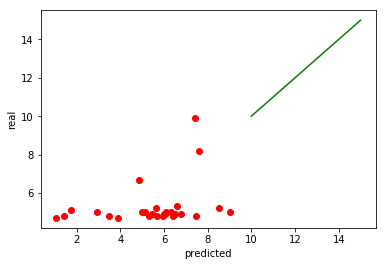

In [34]:
# Plot outputs
import pylab as pl
%matplotlib inline
pl.plot(y_pred, y_test,'ro')
pl.plot([10,15],[10,15], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

#### 10-fold cross validation

In [35]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error


## Here apply the 10-fold
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

train_errors = []
validation_errors = []

for train_index, val_index in kf.split(X, y):

    # split data
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # instantiate model
    linear_pipe = Pipeline([('scl',StandardScaler()),('clf',LinearRegression())])

    #calculate errors
    train_error, val_error = calc_metrics(X_train, y_train, X_val, y_val, linear_pipe)

    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

# generate report
print('mean(train_error): {} | mean(val_error): {}'.format(round(np.mean(train_errors),4),
                                                             round(np.mean(validation_errors),4)))

mean(train_error): 1.4819 | mean(val_error): 4.0245


In [ ]:
# lm_pipe = Pipeline([('scl',StandardScaler()),('clf', LinearRegression())])

In [32]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     2.608
Date:                Tue, 02 Oct 2018   Prob (F-statistic):           8.69e-05
Time:                        23:58:35   Log-Likelihood:                -221.80
No. Observations:                 135   AIC:                             521.6
Df Residuals:                      96   BIC:                             634.9
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0628      0.013      4.741      0.000       0.036       0.089
x2             0.4736      0.576      0.822      0.413      -0.670       1.617
x3            -6.4084      9.584     -0.669      0.505     -25.433      12.617
x4            -7.1034     13.481     -0.527      0.599     -33.863      19.656
x5            13.7483      9.774      1.407      0.163      -5.653      33.150
x6            -4.5274      1.795     -2.523      0.013      -8.090      -0.965
x7           644.1770    397.555      1.620      0.108    -144.964    1433.318
x8           853.4313   1141.556      0.748      0.457   -1412.540    3119.402
x9          -530.6169    387.938     -1.368      0.175   -1300.668     239.435
x10         1174.7938    783.354      1.500      0.137    -380.152    2729.739
x11         -183.8038     88.517     -2.076      0.041    -359.509      -8.099
x12           19.4307     24.779      0.784      0.435     -29.756      68.618
x13           14.8206     11.838      1.252      0.214      -8.679      38.320
x14           -4.6101     23.219     -0.199      0.843     -50.699      41.478
x15           -4.5274      1.795     -2.523      0.013      -8.090      -0.965
x16         -396.8321    396.878     -1.000      0.320   -1184.629     390.965
x17         1.157e+04   8334.826      1.389      0.168   -4969.593    2.81e+04
x18            0.5434      2.839      0.191      0.849      -5.092       6.179
x19         1091.8336    611.711      1.785      0.077    -122.403    2306.070
x20          -52.9796    197.933     -0.268      0.790    -445.873     339.914
x21         -108.8586    102.658     -1.060      0.292    -312.633      94.916
x22          -55.8790    204.304     -0.274      0.785    -461.419     349.661
x23          195.4081    177.009      1.104      0.272    -155.952     546.768
x24          -18.0918     96.442     -0.188      0.852    -209.528     173.344
x25          -34.9118     61.394     -0.569      0.571    -156.778      86.954
x26           27.6631     41.074      0.673      0.502     -53.869     109.195
x27            0.0217      0.051      0.429      0.669      -0.079       0.122
x28           -0.0123      0.020     -0.623      0.535      -0.052       0.027
x29            0.0094      0.043      0.221      0.826      -0.075       0.094
x30          -17.3830     25.318     -0.687      0.494     -67.639      32.873
x31           20.1201     75.436      0.267      0.790    -129.618     169.859
x32         -997.1911    988.096     -1.009      0.315   -2958.546     964.164
x33           37.5588    526.012      0.071      0.943   -1006.567    1081.685
x34           90.5283    319.237      0.284      0.777    -543.153     724.209
x35         -151.3792    194.993     -0.776      0.439    -538.437     235.679
x36         -432.3289    541.382     -0.799      0.427   -1506.963     642.306
x3

[Source](https://github.com/mottalrd/cross-validation-done-wrong/blob/master/Cross%20Validation%20done%20wrong.ipynb)

In [40]:
from sklearn.cross_validation import *
from sklearn.metrics import *
import random
# scikit learn return the negative value for MSE 
# http://stackoverflow.com/questions/21443865/scikit-learn-cross-validation-negative-values-with-mean-squared-error
mse_estimate = -1 * cross_val_score(linear_pipe, X, y, cv=10, scoring='mean_squared_error')

/home/rezwan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/rezwan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/rezwan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/home/rezwan/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [41]:
mse_estimate

array([ 6.00499431,  3.21227356,  3.20046651,  3.0334822 ,  1.59159997,
        4.20216139, 13.25281388,  1.12171496,  0.77044707,  1.95087095])

In [43]:
pd.DataFrame(mse_estimate).mean()

0    3.834082
dtype: float64

In [60]:
import pandas
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold

# # set to 10 folds
# skf = StratifiedKFold(n_splits=10)

## Here apply the 10-fold
from sklearn.model_selection import KFold

K = 10
kf = KFold(n_splits=K, shuffle=True, random_state=42)

# blank lists to store predicted values and actual values
predicted_y = []
expected_y = []

# partition data
for train_index, test_index in kf.split(X, y):
    # specific ".loc" syntax for working with dataframes
    x_train, x_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # create and fit classifier
    linear_pipe = LinearRegression()
#     classifier = GaussianNB()
    linear_pipe.fit(x_train, y_train)

    # store result from classification
    predicted_y.extend(linear_pipe.predict(x_test))

    # store expected result for this specific fold
    expected_y.extend(y_test)

# save and print accuracy
print(len(expected_y))
print(len(predicted_y))
accuracy = metrics.r2_score(expected_y, predicted_y)
print("Accuracy: " + accuracy.__str__())

135
135
Accuracy: -0.20985655732894037
